In [65]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from operator import attrgetter

### **Load Data**

In [66]:
data = pd.read_csv('../data/processed/master_data.csv', engine='pyarrow')
data

,customer_unique_id,customer_id,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,...,price,freight_value,order_item_count,product_category_name,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value,review_score
0,b7d76e111c89f7ebf14761390f0f7d17,08c5351a6aca1c1589a38f244edeee9d,2e7a8482f6fb09756ca50c10d7bfc047,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaT,2016-10-20,c1488892604e4ba5cff5b4eb4d595400,...,39.99,31.67,1.0,moveis_decoracao,furniture_decor,1.0,credit_card,1.0,136.23,1.0
1,b7d76e111c89f7ebf14761390f0f7d17,08c5351a6aca1c1589a38f244edeee9d,2e7a8482f6fb09756ca50c10d7bfc047,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaT,2016-10-20,f293394c72c9b5fafd7023301fc21fc2,...,32.90,31.67,1.0,moveis_decoracao,furniture_decor,1.0,credit_card,1.0,136.23,1.0
2,4854e9b3feff728c13ee5fc7d1547e92,683c54fc24d40ee9f8a6fc179fd9856c,e5fa5a7210941f7d56d0208e4e071d35,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaT,NaT,2016-10-28,f3c2d01a84c947b078e32bbef0718962,...,59.50,15.56,1.0,telefonia,telephony,1.0,credit_card,3.0,75.06,1.0
3,009b0127b727ab0ba422f6d9604487c7,622e13439d6b5a0b486c435618b2679e,809a282bbd5dbcabb6f2f724fca862ec,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,NaT,NaT,2016-09-30,unknown,...,-1.00,-1.00,1.0,diversas,miscellaneous,1.0,credit_card,2.0,40.95,1.0
4,830d5b7aaa3b6f1e9ad63703bec97d23,86dc2ffce2dfff336de2f386a786e574,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,5a6b04657a4c5ee34285d1e4619a96b4,...,44.99,2.83,3.0,beleza_saude,health_beauty,1.0,credit_card,1.0,143.46,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107850,9bb92bebd4cb7511e1a02d5e50bc4655,2823ffda607a2316375088e0d00005ec,392ed9afd714e3c74767d0c4d3e3f477,canceled,2018-09-29 09:13:03,NaT,NaT,NaT,2018-10-15,unknown,...,-1.00,-1.00,1.0,diversas,miscellaneous,1.0,voucher,1.0,137.03,1.0
107851,634420a0ea42302205032ed44ac7fccc,bf6181a85bbb4115736c0a8db1a53be3,616fa7d4871b87832197b2a137a115d2,canceled,2018-10-01 15:30:09,NaT,NaT,NaT,2018-10-23,unknown,...,-1.00,-1.00,1.0,diversas,miscellaneous,1.0,voucher,1.0,80.38,2.0
107852,af5454198a97379394cacf676e1e96cb,4c2ec60c29d10c34bd49cb88aa85cfc4,a2ac6dad85cf8af5b0afb510a240fe8c,canceled,2018-10-03 18:55:29,NaT,NaT,NaT,2018-10-16,unknown,...,-1.00,-1.00,1.0,diversas,miscellaneous,1.0,voucher,1.0,197.55,1.0
107853,262e1f1e26e92e86375f86840b4ffd63,856336203359aa6a61bf3826f7d84c49,b059ee4de278302d550a3035c4cdb740,canceled,2018-10-16 20:16:02,NaT,NaT,NaT,2018-11-12,unknown,...,-1.00,-1.00,1.0,diversas,miscellaneous,1.0,voucher,1.0,222.03,5.0


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107855 entries, 0 to 107854
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_unique_id             107855 non-null  object        
 1   customer_id                    107855 non-null  object        
 2   order_id                       107855 non-null  object        
 3   order_status                   107855 non-null  object        
 4   order_purchase_timestamp       107855 non-null  datetime64[ns]
 5   order_approved_at              107680 non-null  datetime64[ns]
 6   order_delivered_carrier_date   105948 non-null  datetime64[ns]
 7   order_delivered_customer_date  104683 non-null  datetime64[ns]
 8   order_estimated_delivery_date  107855 non-null  object        
 9   product_id                     107855 non-null  object        
 10  seller_id                      107855 non-null  object        
 11  

### **Data Analysis**

In [68]:
# buat copyan data utama
data_eda = data.copy()

# tambahkan kolom tanggal, bulan, tahun 
data_eda['order_date'] = data_eda['order_purchase_timestamp'].dt.date
data_eda['order_month'] = data_eda['order_purchase_timestamp'].dt.to_period('M')
data_eda['order_year'] = data_eda['order_purchase_timestamp'].dt.to_period('Y')

#### **Order Trend**

In [69]:
dfRev = data_eda.query('order_status == "delivered"').drop_duplicates(subset=['order_id','order_purchase_timestamp','payment_sequential','payment_value'], keep='first').groupby('order_month')['payment_value'].sum()
dfOrd = data_eda.groupby('order_month')['order_id'].nunique()
dfCust = data_eda.groupby('order_month')['customer_unique_id'].nunique()

dfTrend = pd.concat([dfRev,dfOrd,dfCust], axis=1).rename(columns={"payment_value": "revenue", "order_id": "n_orders", "customer_unique_id": "n_customers"})
dfTrend.head()

,revenue,n_orders,n_customers
order_month,,,
2016-09,143.46,4,4
2016-10,46566.71,324,321
2016-12,19.62,1,1
2017-01,127545.67,800,765
2017-02,271298.65,1780,1755


<Axes: xlabel='order_month'>

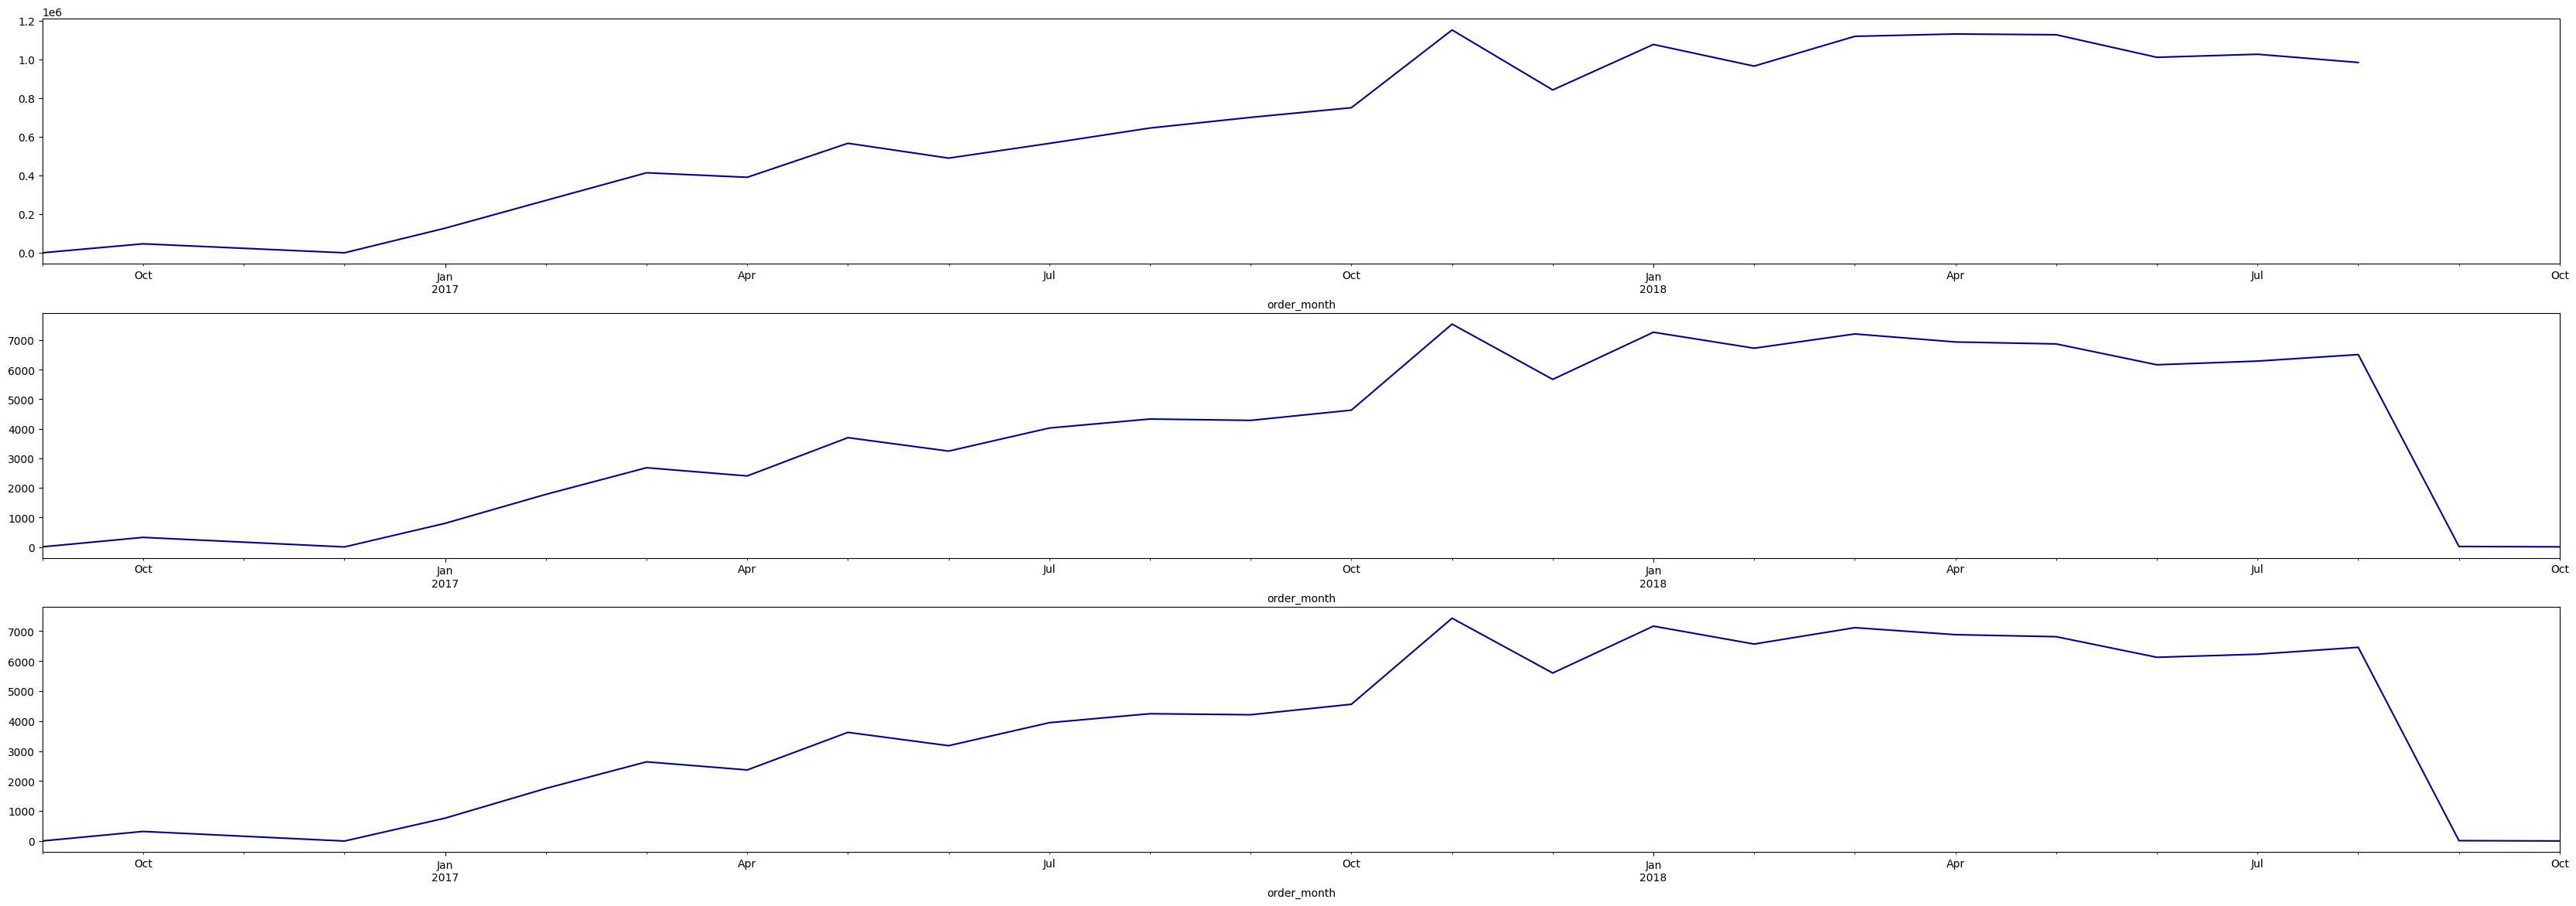

In [70]:
fig, axes = plt.subplots(3,1, figsize=(42, 14))
dfTrend['revenue'].plot(kind='line', color='darkblue', ax=axes[0])
dfTrend['n_orders'].plot(kind='line', color='darkblue', ax=axes[1])
dfTrend['n_customers'].plot(kind='line', color='darkblue', ax=axes[2])


#### **Sales per State**

#### **Sales per Product**

#### **Customer Behaviour**

#### **Customer Retention**

In [71]:
dfCohort = data_eda.drop_duplicates(subset='order_id', keep='first')[['customer_unique_id', 'order_month']]
dfCohort['cohort_month'] = dfCohort.groupby('customer_unique_id')['order_month'].transform('min')
dfCohort.head()

,customer_unique_id,order_month,cohort_month
0,b7d76e111c89f7ebf14761390f0f7d17,2016-09,2016-09
2,4854e9b3feff728c13ee5fc7d1547e92,2016-09,2016-09
3,009b0127b727ab0ba422f6d9604487c7,2016-09,2016-09
4,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09,2016-09
5,0eb1ee9dba87f5b36b4613a65074337c,2016-10,2016-10


In [72]:
# Number of distinct customer
dfCohort = dfCohort.groupby(['order_month','cohort_month'])\
            .agg(n_customers = ('customer_unique_id', 'nunique'))\
            .reset_index(drop=False)

# Period = current month - cohort month
dfCohort['period'] = (dfCohort['order_month'] - dfCohort['cohort_month']).apply(attrgetter('n'))

dfCohort.head()

,order_month,cohort_month,n_customers,period
0,2016-09,2016-09,4,0
1,2016-10,2016-10,321,0
2,2016-12,2016-12,1,0
3,2017-01,2016-12,1,1
4,2017-01,2017-01,764,0


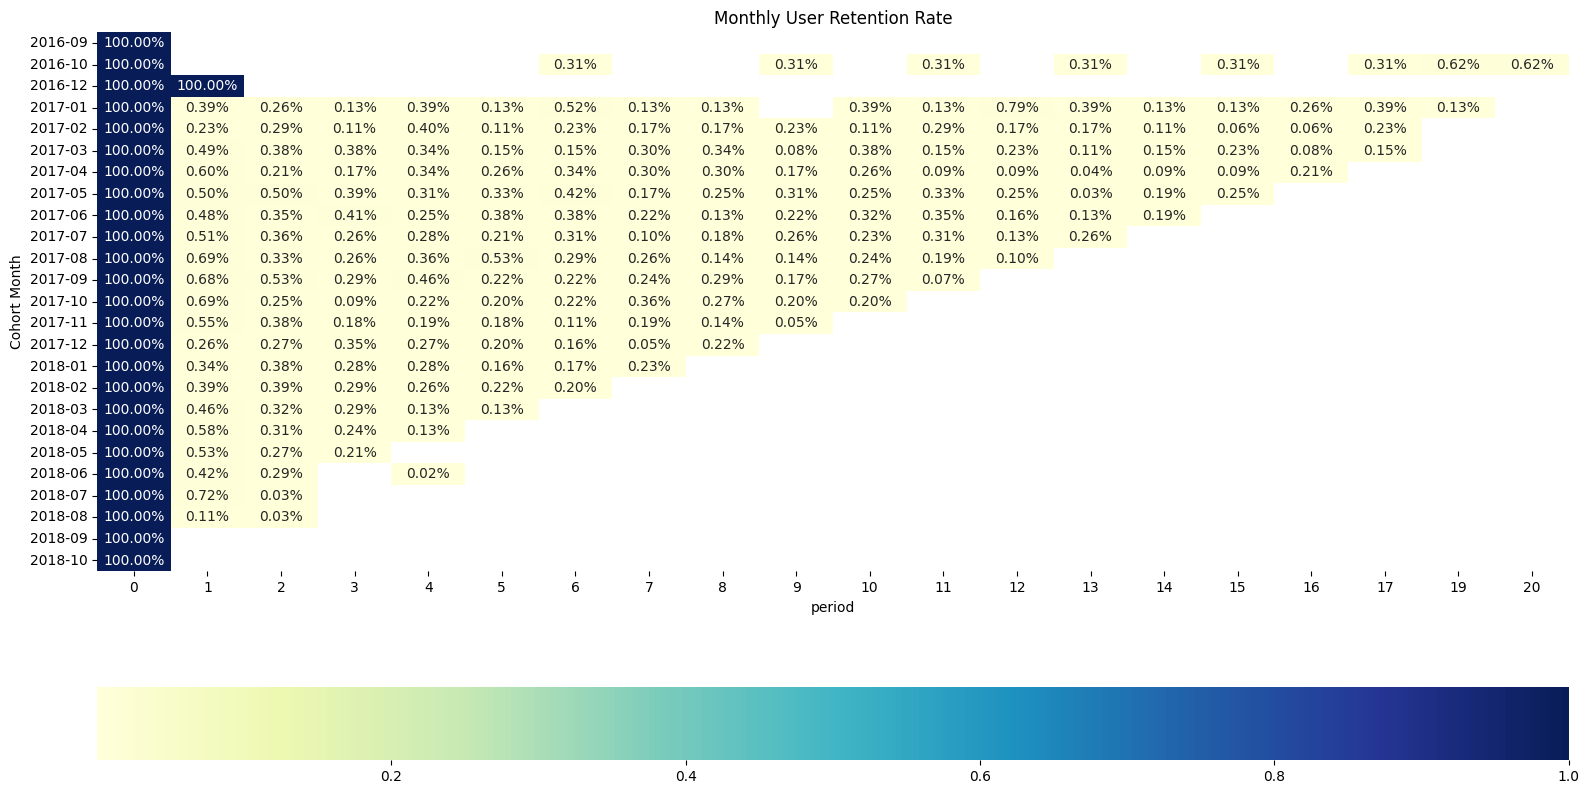

In [73]:
# Pivot Cohort
pivot_cohort = dfCohort.pivot_table(index='cohort_month', columns='period', values='n_customers')
pivot_cohort = pivot_cohort.divide(pivot_cohort[0], axis=0)

plt.figure(figsize=(16,8))
sns.heatmap(pivot_cohort,
            annot=True,
            fmt='.2%',
            cmap='YlGnBu',
            cbar_kws={'orientation':'horizontal'})
plt.tight_layout()
plt.xlabel('period')
plt.ylabel('Cohort Month')
plt.title('Monthly User Retention Rate')
plt.show()